<a href="https://colab.research.google.com/github/ajaykumar080286/DeepLearning/blob/master/zero_initialization_relu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('1.ushape.csv')

In [3]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [4]:
df.columns = ["X", "Y", "class"]

In [5]:
df = df.round(2)

In [6]:
df.head()

,X,Y,class
0,2.12,-0.05,1.0
1,0.88,-0.08,0.0
2,-0.06,-0.04,1.0
3,0.83,-0.54,1.0
4,2.11,0.66,1.0


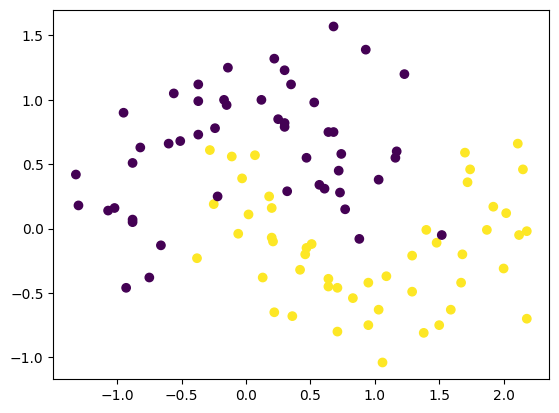

In [7]:
plt.scatter(df['X'], df['Y'], c=df['class'])

In [8]:
df.head(1)

,X,Y,class
0,2.12,-0.05,1.0


In [9]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout


In [11]:
model=Sequential()

In [32]:
#model.add(Dense(2, activation='tanh', input_dim=2))
model.add(Dense(2, activation='relu', input_dim=2))

model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36 (148.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20 (84.00 B)

In [34]:
initial_weights = model.get_weights()

In [35]:
#initial_weights[0] = np.zeros(model.get_weights()[0].shape)
#initial_weights[1] = np.zeros(model.get_weights()[1].shape)
#initial_weights[2] = np.zeros(model.get_weights()[2].shape)
#initial_weights[3] = np.zeros(model.get_weights()[3].shape)

initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [36]:
model.set_weights(initial_weights)
initial_weights

[array([[0.5, 0.5],
        [0.5, 0.5]]),
 array([0.5, 0.5]),
 array([[0.5],
        [0.5]]),
 array([0.5]),
 array([[0.42485642, 0.8890022 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[1.1593176],
        [1.3079506]], dtype=float32),
 array([0.], dtype=float32)]

In [37]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.5305 - loss: 0.8368 - val_accuracy: 0.5000 - val_loss: 0.8436
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5149 - loss: 0.8512 - val_accuracy: 0.5000 - val_loss: 0.8380
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5539 - loss: 0.7987 - val_accuracy: 0.5000 - val_loss: 0.8329
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.4914 - loss: 0.8691 - val_accuracy: 0.5000 - val_loss: 0.8277
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5149 - loss: 0.8386 - val_accuracy: 0.5000 - val_loss: 0.8228
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4914 - loss: 0.8590 - val_accuracy: 0.5000 - val_loss: 0.8179
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5305 - loss: 0.8095 - val_accuracy: 0.5000 - val_loss: 0.8132
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4914 - loss: 0.8446 - val_accuracy: 0.5000 - val_loss

In [39]:
initial_weights

[array([[0.5, 0.5],
        [0.5, 0.5]]),
 array([0.5, 0.5]),
 array([[0.5],
        [0.5]]),
 array([0.5]),
 array([[0.42485642, 0.8890022 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[1.1593176],
        [1.3079506]], dtype=float32),
 array([0.], dtype=float32)]

In [40]:
model.get_weights()

[array([[0.7226084 , 0.7226084 ],
        [0.23633339, 0.23633339]], dtype=float32),
 array([0.31826594, 0.31826594], dtype=float32),
 array([[0.38062745],
        [0.38062745]], dtype=float32),
 array([0.32492664], dtype=float32),
 array([[0.27055177, 0.7233787 ]], dtype=float32),
 array([-0.16267017, -0.17771101], dtype=float32),
 array([[1.0541373],
        [1.163415 ]], dtype=float32),
 array([-0.18331087], dtype=float32)]

In [41]:
from mlxtend.plotting import plot_decision_regions

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

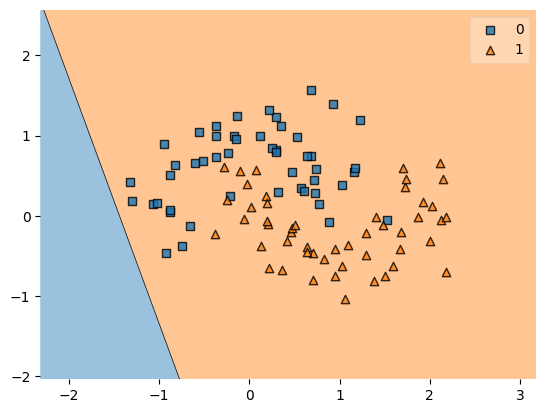

In [42]:
plot_decision_regions(X.values,y.values.astype('int'),model)